# Desafío Facts

In [1]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, matplotlib, geopandas as gpd
import matplotlib.style as style
%matplotlib inline
style.use('seaborn-pastel')
matplotlib.rcParams['font.family'] = "Calibri"
sns.set_palette('Set2')  
# sns.set_context('talk')

Unable to open EPSG support file gcs.csv.  Try setting the GDAL_DATA environment variable to point to the directory containing EPSG csv files.


In [ ]:
style.available

In [2]:
prov=gpd.read_file('provincia.json')
prov_x_lim=(-75,-52)
prov_y_lim=(-58,-20)
prov=prov[['nam','geometry']]

In [3]:
df=pd.read_csv('demanda-ltimos-aos (1).csv')

In [13]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

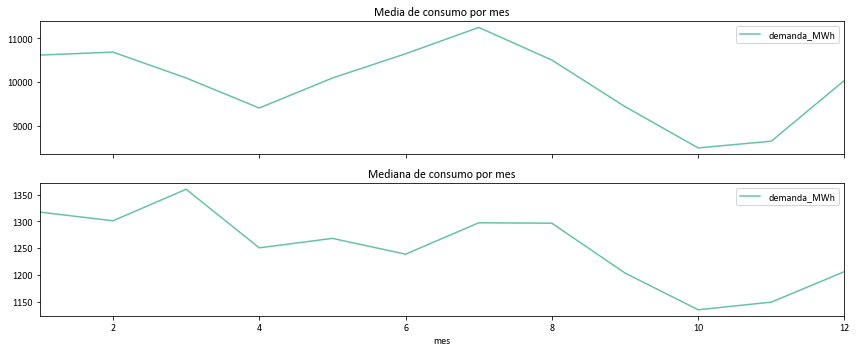

In [18]:
fig, ejes=plt.subplots(2,1,figsize=(12,5), sharex=True)
agrup=['mes']
df.groupby(agrup).mean()[['demanda_MWh']].plot(ax=ejes[0])
ejes[0].set_title('Media de consumo por mes')
df.groupby(agrup).median()[['demanda_MWh']].plot(ax=ejes[1])
ejes[1].set_title('Mediana de consumo por mes');

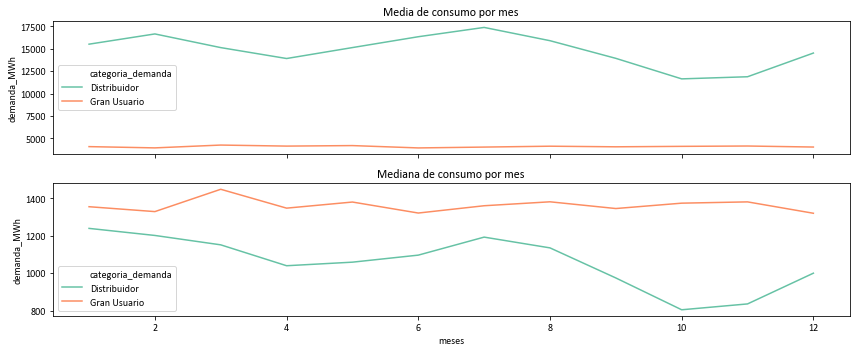

In [48]:
fig, ejes=plt.subplots(2,1,figsize=(12,5), sharex=True)
agrup=['mes','categoria_demanda']

plot = df.groupby(agrup).mean()[['demanda_MWh']]
y=plot.demanda_MWh
x=plot.index.get_level_values(0)
hue=plot.index.get_level_values(1)
sns.lineplot(x=x,y=y ,hue=hue,ax=ejes[0])
ejes[0].set_title('Media de consumo por mes')

plot = df.groupby(agrup).median()[['demanda_MWh']]
y=plot.demanda_MWh
x=plot.index.get_level_values(0)
hue=plot.index.get_level_values(1)
sns.lineplot(x=x,y=y ,hue=hue,ax=ejes[1])
ejes[1].set_title('Mediana de consumo por mes');
# plt.savefig('visuales\mes.png', bbox_inches = "tight")

plt.xlabel('meses');

''

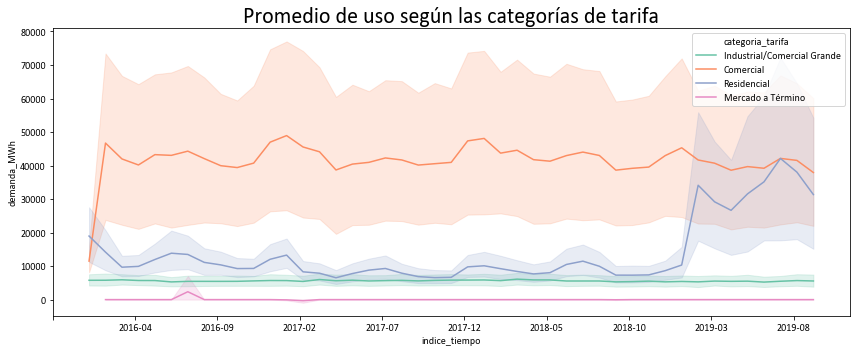

In [47]:
fig, ejes=plt.subplots(figsize=(12,5))
graf=sns.lineplot(df.indice_tiempo, df.demanda_MWh, hue=df.categoria_tarifa, ax=ejes, estimator='mean')
graf.set_title('Promedio de uso según las categorías de tarifa', fontsize=22)
start, end = ejes.get_xlim()
ejes.xaxis.set_ticks(np.arange(start, end, 5))
# plt.savefig('visuales\promedio_categoria.png', bbox_inches = "tight")
;

In [94]:
df['year'] = '2015'
for anio in ['2016','2017','2018','2019']:
    df.loc[df.indice_tiempo.apply(lambda x: anio in x), 'year'] = anio

In [96]:
df.head(2)

,id,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo,year
0,456657,2016,1,AARGTAOY,AEROP ARG 2000 - Aeroparque,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,2156.918,2016-01,2016
1,456658,2016,1,ABRILHCY,ABRIL CLUB DE CAMPO,GU,GRAN BS.AS.,BUENOS AIRES,Gran Usuario MEM,Gran Usuario,GUMAS/AUTOGENERADORES,Industrial/Comercial Grande,1313.446,2016-01,2016


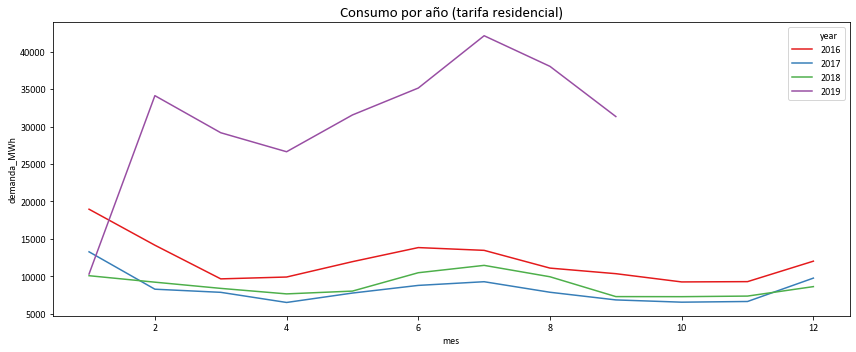

In [264]:
p=df[(df.categoria_tarifa=='Residencial')]

fig, ejes=plt.subplots(figsize=(12,5))
graf=sns.lineplot(p.mes, p.demanda_MWh, hue=p.year, ax=ejes, estimator='mean', err_style=None,
                 palette=sns.color_palette("Set1", p.year.nunique()))
ejes.set_title('Consumo por año (tarifa residencial)', fontsize=15)
plt.savefig(r'visuales\residencial_mes.png', bbox_inches = "tight")

Text(0.5, 1.0, 'Consumo por region (tarifa residencial-2019)')

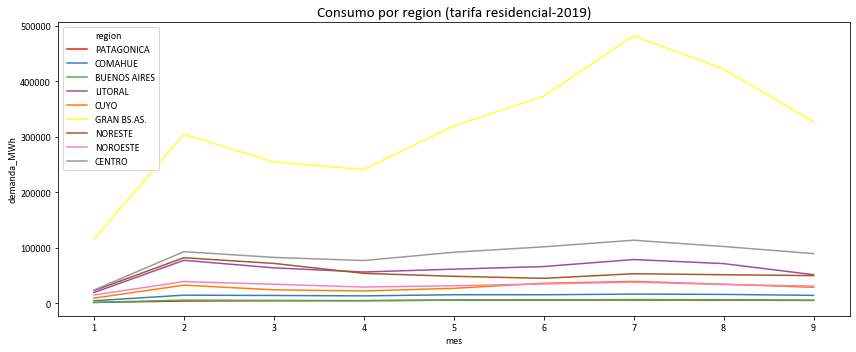

In [245]:
p=df[(df.categoria_tarifa=='Residencial')&(df.year=='2019')]

fig, ejes=plt.subplots(figsize=(12,5))
graf=sns.lineplot(p.mes, p.demanda_MWh, hue=p.region, ax=ejes, estimator='mean', err_style=None,
                 palette=sns.color_palette("Set1", p.region.nunique()))
ejes.set_title('Consumo por region (tarifa residencial-2019)', fontsize=15)
# plt.savefig(r'visuales\residencial_2019_region.png', bbox_inches = "tight")

In [169]:
p.agente_descripcion.unique()

array(['EDELAP SA', 'EDENOR DISTRIBUIDOR', 'EDESUR DISTRIBUIDOR'],
      dtype=object)

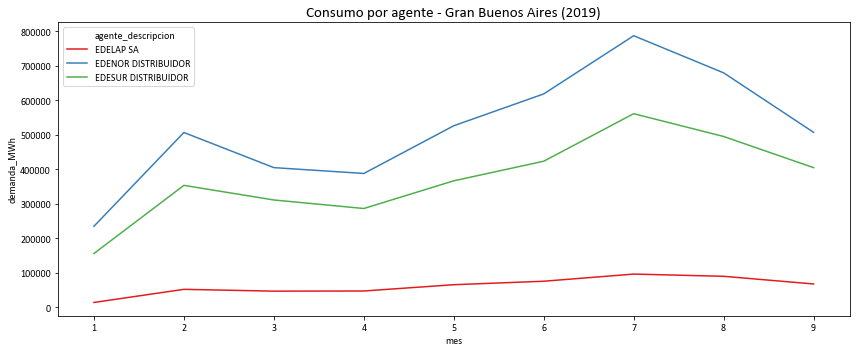

In [246]:
p=df[(df.categoria_tarifa=='Residencial')&(df.year=='2019')&(df.region=='GRAN BS.AS.')]

fig, ejes=plt.subplots(figsize=(12,5))
graf=sns.lineplot(p.mes, p.demanda_MWh, hue=p.agente_descripcion, ax=ejes, estimator='mean', err_style=None,
                 palette=sns.color_palette("Set1", p.agente_descripcion.nunique()))
graf.set_title('Consumo por agente - Gran Buenos Aires (2019)', fontsize=15)
plt.savefig(r'visuales\residencial_2019_agente.png', bbox_inches = "tight")

In [247]:
df_prov=df[(df.year=='2019')&(df.categoria_tarifa=='Residencial')].groupby('provincia').sum()[['demanda_MWh']].reset_index()

In [248]:
df_prov.provincia=df_prov.provincia.apply(lambda x: x.lower())
prov.nam=prov.nam.apply(lambda x: x.lower())
#sacamos tildes
trans = str.maketrans('áéíóúü','aeiouu')
prov.nam=prov.nam.apply(lambda l: str(l).translate(trans))
#corregimos nombre
df_prov.iloc[20, 0]='santiago del estero'

In [249]:
df_prov=pd.merge(prov, df_prov, left_on='nam',right_on='provincia', how='left')

C:\Users\tomms\Anaconda3\envs\Osmnx\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


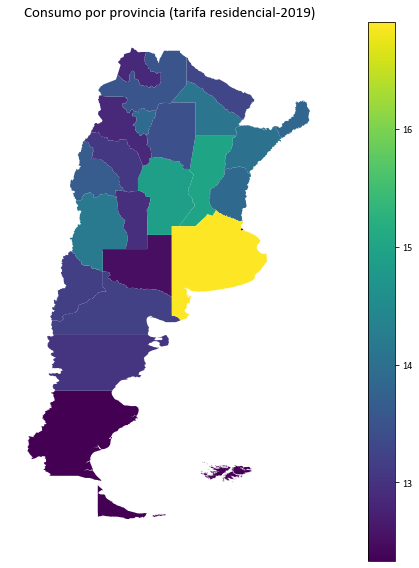

In [250]:
fig,ax=plt.subplots(figsize=(10,8))
df_prov['demanda_log']=np.log(df_prov.demanda_MWh)
(df_prov).plot(column='demanda_log',ax=ax, legend=True)
ax.set_title('Consumo por provincia (tarifa residencial-2019)', fontsize=15)
plt.xlim(prov_x_lim)
plt.ylim(prov_y_lim)
ax.set_axis_off()
# plt.savefig(r'visuales\prov_2019_mapa_residenciales.png', bbox_inches = "tight");

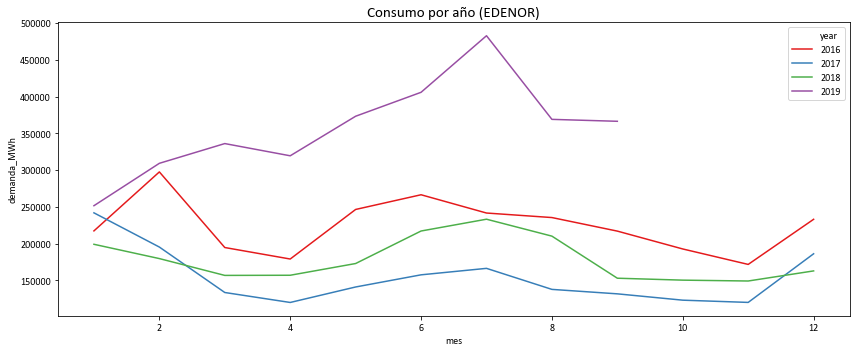

In [267]:
p=df[df.agente_nemo=='EDENOROD']
fig, ejes=plt.subplots(figsize=(12,5))

graf=sns.lineplot(p.mes, p.demanda_MWh, hue=p.year, ax=ejes, estimator='mean', err_style=None,
                 palette=sns.color_palette("Set1", p.year.nunique()))
ejes.set_title('Consumo por año (EDENOR)', fontsize=15)
plt.savefig(r'visuales\edenor_mes.png', bbox_inches = "tight")

Text(0.5, 1.0, 'Consumo por categoría de tarifa (EDENOR-07/2019)')

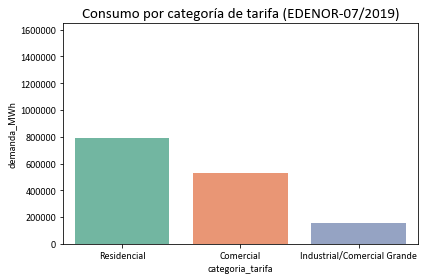

In [293]:
p=p[(p.year=='2019')&(p.mes==7)]

g=sns.barplot(p.categoria_tarifa, p.demanda_MWh, errwidth=0)
g.set_title('Consumo por categoría de tarifa (EDENOR-07/2019)', fontsize=15)
# plt.savefig(r'visuales\edenor_julio_tarifa.png', bbox_inches = "tight");

In [329]:
p=df[df.agente_nemo=='EDENOROD']
p['residencial'] = 'no residencial'
p[p.categoria_tarifa=='Residencial'] = 'residencial'

C:\Users\tomms\Anaconda3\envs\Osmnx\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tomms\Anaconda3\envs\Osmnx\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


C:\Users\tomms\Anaconda3\envs\Osmnx\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\tomms\Anaconda3\envs\Osmnx\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


''

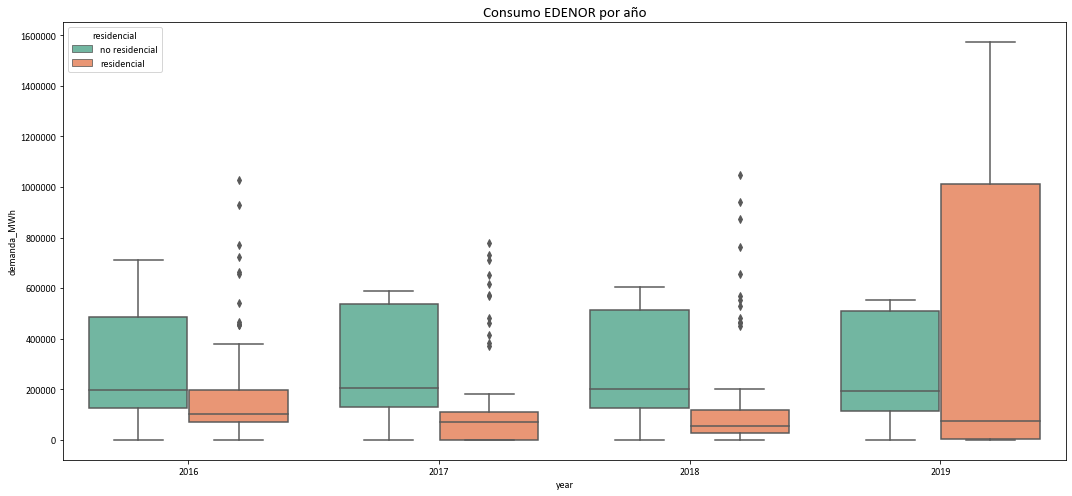

In [338]:
p=df[df.agente_nemo=='EDENOROD']
p['residencial'] = 'no residencial'
p.loc[p.categoria_tarifa=='Residencial','residencial'] = 'residencial'

fig, eje=plt.subplots(figsize=(15,7))
sns.boxplot(y=p.demanda_MWh, x=p.year, hue=p.residencial)
plt.title('Consumo EDENOR por año', fontsize=15)
plt.savefig(r'visuales\edenor_box.png', bbox_inches = "tight")
;

In [340]:
df[df.categoria_tarifa=='Comercial']

,id,anio,mes,agente_nemo,agente_descripcion,tipo_agente,region,provincia,categoria_area,categoria_demanda,tarifa,categoria_tarifa,demanda_MWh,indice_tiempo,year
34,456691,2016,1,APELPALD,APELP,DI,COMAHUE,LA PAMPA,Resto,Distribuidor,Alumbrado Publico,Comercial,4221.286,2016-01,2016
36,456693,2016,1,APELPALD,APELP,DI,COMAHUE,LA PAMPA,Resto,Distribuidor,MENOR 10KW NO RES. MAYOR O IGUAL 4000 KWH/BIM,Comercial,6479.207,2016-01,2016
37,456694,2016,1,APELPALD,APELP,DI,COMAHUE,LA PAMPA,Resto,Distribuidor,MENOR 10KW NO RES. MENOR 4000 KWH BIM,Comercial,13004.300,2016-01,2016
42,456699,2016,1,APELPALD,APELP,DI,COMAHUE,LA PAMPA,Resto,Distribuidor,SANCIONADO DEM.MAYOR O IGUAL 10 Y MENOR300 KW,Comercial,12701.352,2016-01,2016
94,456750,2016,1,C16OCTUW,COOP. 16 DE OCTUBRE,DI,PATAGONICA,CHUBUT,Resto,Distribuidor,Alumbrado Publico,Comercial,431.491,2016-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49153,505810,2019,9,MUPITRZW,COOP. MUNIC PICO TRUNCADO,DI,PATAGONICA,SANTA CRUZ,Resto,Distribuidor,TARIFA USUARIO NO RESIDENCIAL <300KWH,Comercial,1919.968,2019-09,2019
49222,505879,2019,9,SECHEPHD,SECHEEP,DI,NORESTE,CHACO,Resto,Distribuidor,TARIFA USUARIO NO RESIDENCIAL <300KWH,Comercial,51324.938,2019-09,2019
49249,505906,2019,9,SPSECRZD,SPSE SANTA CRUZ,DI,PATAGONICA,SANTA CRUZ,Resto,Distribuidor,TARIFA USUARIO NO RESIDENCIAL <300KWH,Comercial,26961.691,2019-09,2019
49255,505912,2019,9,TANDIL3W,USINA POPULAR DE TANDIL-DISTR.,DI,BUENOS AIRES,BUENOS AIRES,Resto,Distribuidor,TARIFA USUARIO NO RESIDENCIAL <300KWH,Comercial,11759.640,2019-09,2019


In [346]:
df[['demanda_MWh','region']].pivot_table(index='region', values='demanda_MWh',aggfunc='sum').sort_values(by='demanda_MWh')

,demanda_MWh
region,
COMAHUE,1.914130e+07
PATAGONICA,2.044234e+07
CUYO,3.050618e+07
NORESTE,3.485476e+07
NOROESTE,4.131827e+07
CENTRO,4.295626e+07
BUENOS AIRES,5.661837e+07
LITORAL,6.048128e+07
GRAN BS.AS.,1.891377e+08
